In [7]:
import pyvisa
import time
import matplotlib.pyplot as plt 
import numpy as np
import csv 
import os
from pyvisa.constants import ControlFlow, Parity, StopBits

In [8]:
rm = pyvisa.ResourceManager()
resource_string = "GPIB0::7::INSTR"
voltmeter = rm.open_resource(resource_string)

In [9]:
voltmeter.baud_rate = 19200
voltmeter.parity = pyvisa.constants.Parity.none
voltmeter.stop_bits = pyvisa.constants.StopBits.one
voltmeter.data_bits = 8
voltmeter.flow_control = ControlFlow.none

In [10]:
voltmeter.write(':SENS:VOLT:DC:NPLC 0.1')
voltmeter.write(':SENS:VOLT:DC:DFIL:STAT OFF')

29

In [11]:
print(voltmeter.query('*IDN?'))

KEITHLEY INSTRUMENTS INC.,MODEL 2182A,4658571,C08/B01  



In [12]:
voltmeter.write(":CONF:VOLT")
voltmeter.write('TRIG:DEL 0.5')
voltmeter.write(':SAMP:COUN 10')
voltmeter.write("CONF:VOLT")
data = voltmeter.write("MEAS?")
data = voltmeter.query("READ?")

VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

In [13]:
data

7

In [14]:
data_list = []
time_array = []
timestamps = []
i = 1
while i<50:
    i+=1
    time.sleep(0.03)
    data = voltmeter.query("MEAS?")
    data_list.append(data)
    time_array.append(0.1*i)
    timestamps.append(time.time())

In [15]:
data_list
cleaned_data = [float(item.strip()) for item in data_list]

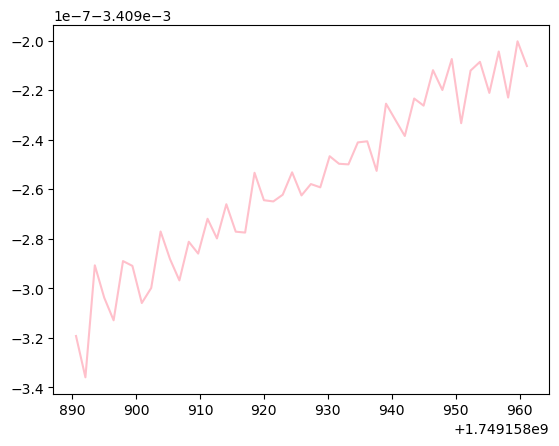

In [17]:
plt.plot(timestamps, cleaned_data, color = 'pink')

In [19]:
timestamps[3]-timestamps[2]

1.4747288227081299

In [21]:
voltmeter.write(":TRAC:CLE")            
voltmeter.write(":TRAC:POIN 1000")       
voltmeter.write(":TRAC:FEED SENS")    
voltmeter.write(":INIT:CONT ON")      
voltmeter.write(":INIT")      

data_list = []
time_array = []
timestamps = []
start = time.time()
i = 1
while i<1000:
    i+=1
    time.sleep(1)
    data = voltmeter.query(":FETCH?")
    data_list.append(float(data))
    timestamps.append(time.time()-start)


KeyboardInterrupt: 

In [23]:
data_list, timestamps

([-0.00341232102,
  -0.00341236435,
  -0.00341240633,
  -0.00341245525,
  -0.00341248717,
  -0.00341248695,
  -0.00341256084,
  -0.00341259598,
  -0.00341263609,
  -0.00341267073,
  -0.00341269023,
  -0.00341272823,
  -0.00341277442,
  -0.00341282083,
  -0.00341284939,
  -0.0034128967,
  -0.00341292315,
  -0.00341295807,
  -0.0034129988,
  -0.00341303022,
  -0.00341307639,
  -0.00341308086,
  -0.00341311824,
  -0.00341318244,
  -0.00341319844,
  -0.00341323309,
  -0.00341328561,
  -0.00341329989,
  -0.00341334993,
  -0.00341339103,
  -0.00341342183,
  -0.00341345548,
  -0.00341348963,
  -0.00341352651,
  -0.00341356053,
  -0.00341359282,
  -0.00341363599,
  -0.00341368603,
  -0.00341368827,
  -0.00341374663,
  -0.00341376917,
  -0.00341380879,
  -0.00341385374,
  -0.00341389807,
  -0.00341392246,
  -0.00341396269,
  -0.00341400404,
  -0.00341403819,
  -0.00341408552,
  -0.00341409657,
  -0.00341414128,
  -0.00341417729,
  -0.00341421516,
  -0.00341424484,
  -0.0034143001,
  -0.00341433

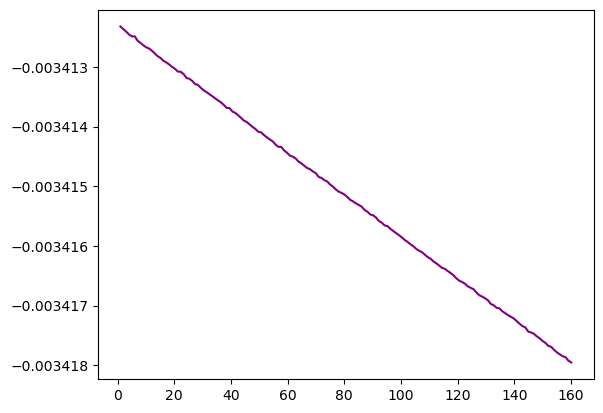

In [22]:
plt.plot(timestamps, data_list, color = 'purple')

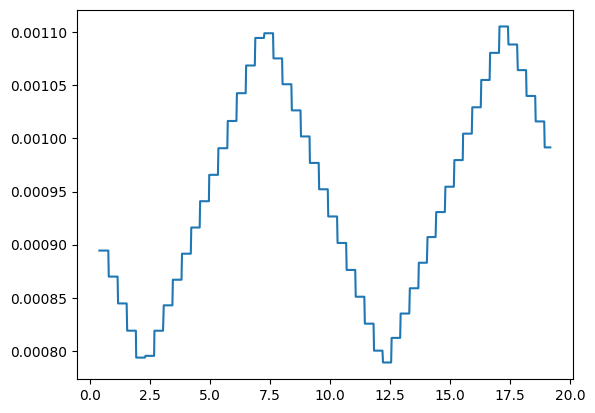

In [47]:
plt.plot(timestamps[:1000], data_list[:1000])

In [48]:
voltmeter.query(":OUTP:GAIN?")
#voltmeter.write("OUTP:GAIN 10")

'1.000000E+01\r\n'

In [4]:
osci.close()